# kerasでMNISTを解くサンプルコード

- 参考URL <br>
https://keras.io/examples/mnist_cnn/

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [5]:
# データ読み込み
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # mnist.load_data()が失敗する場合、予めダウンロードしたmnistデータを読み込む
# import numpy as np
# x_train = np.load("../mnist/mnist.npz")['x_train']
# y_train = np.load("../mnist/mnist.npz")['y_train']
# x_test = np.load("../mnist/mnist.npz")['x_test']
# y_test = np.load("../mnist/mnist.npz")['y_test']

In [6]:
# データ前処理
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices（1-hotベクトル化）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# モデルの生成
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [8]:
# 学習と評価
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[])
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 101s 2ms/step - loss: 0.2541 - accuracy: 0.9227 - val_loss: 0.0624 - val_accuracy: 0.9797
Epoch 2/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0873 - accuracy: 0.9743 - val_loss: 0.0384 - val_accuracy: 0.9866
Epoch 3/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 4/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0545 - accuracy: 0.9839 - val_loss: 0.0302 - val_accuracy: 0.9897
Epoch 5/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 6/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0280 - val_accuracy: 0.9911
Epoch 7/12
60000/60000 [==============================] - 113s

/Users/kusa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


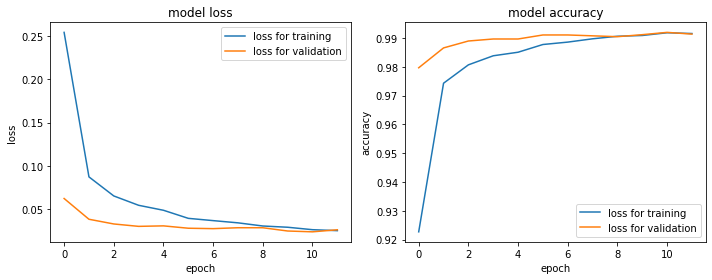

In [10]:
# グラフ化
from matplotlib import pyplot as plt
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['accuracy'],label="loss for training")
    axR.plot(fit.history['val_accuracy'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='lower right')

plot_history_loss(history)
plot_history_acc(history)

fig.tight_layout()
fig.show()